# Assign 3

# SVM Implementation


*   Load and preprocess the breast cancer dataset
*   Handle feature scaling (crucial for this dataset)
*  Implement SVM classification using scikit-learn
*   Experiment with different kernel functions (Linear, Polynomial, RBF)
* Analyze the impact of different parameter choices on diagnostic accuracy
*  Analyze feature importance for medical diagnosis

1. Importing libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import time
from sklearn.metrics import accuracy_score, mean_squared_error


2. Load dataset

In [ ]:
data=pd.read_csv('/content/brca.csv')
data.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


3. Removing index column and changing Begnin = 0 and Mal =1

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data['y'] = data['y'].map({'B': 0, 'M': 1})
data.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


4. Separate x and y

In [ ]:
X = data.drop('y', axis=1)
y = data['y']
data.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


5. Standardize featues, standardization ensures that all features are on the same scale.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

6. Split data
(60% training, 20% testing, 20% CV)

In [ ]:
#  data splitting 60% training and 40% remaining
X_train, X_remaining, y_train, y_remaining = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42
)

# splitting remaining 40% into 20% testing and 20% CV
X_test, X_cv, y_test, y_cv = train_test_split(
    X_remaining, y_remaining, test_size=0.5, random_state=42
)


7. Train SVM with Different Kernels

In [ ]:
# values to test with
kernels = ['linear', 'poly', 'rbf']
C_values = [ 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] #for rbf and poly
degrees = [1, 2, 3, 4, 5, 6]  #used for poly only

results = []
for kernel in kernels:
    for C in C_values:
        for gamma in (gamma_values if kernel != 'linear' else [None]):  # Skip gamma for linear kernel
            for degree in (degrees if kernel == 'poly' else [None]):  # Skip degree for non-poly kernels

                # Initialize SVM model
                svm = SVC(kernel=kernel, C=C, gamma=gamma if gamma is not None else 'auto', degree=degree if degree else 3)
                svm.fit(X_train, y_train)

                # Predict on the validation set
                y_val_pred = svm.predict(X_cv)

                # Compute metrics
                mse = mean_squared_error(y_cv, y_val_pred)
                accuracy = accuracy_score(y_cv, y_val_pred)

                results.append({
                    'Kernel': kernel,
                    'C': C,
                    'Gamma': gamma if kernel != 'linear' else None,
                    'Degree': degree if kernel == 'poly' else None,
                    'MSE': mse,
                    'Accuracy': accuracy
                })


#  results to DataFrame
results_df = pd.DataFrame(results)


print(results_df)


     Kernel         C   Gamma  Degree       MSE  Accuracy
0    linear     0.001     NaN     NaN  0.052632  0.947368
1    linear     0.010     NaN     NaN  0.017544  0.982456
2    linear     0.100     NaN     NaN  0.017544  0.982456
3    linear     1.000     NaN     NaN  0.017544  0.982456
4    linear    10.000     NaN     NaN  0.026316  0.973684
..      ...       ...     ...     ...       ...       ...
345     rbf  1000.000    0.01     NaN  0.017544  0.982456
346     rbf  1000.000    0.10     NaN  0.017544  0.982456
347     rbf  1000.000    1.00     NaN  0.324561  0.675439
348     rbf  1000.000   10.00     NaN  0.324561  0.675439
349     rbf  1000.000  100.00     NaN  0.324561  0.675439

[350 rows x 6 columns]


8. Looping on the results to find which ooutput from each kernel (poly, rbf and linear) has the best accuracy and MSE


In [ ]:
# Find the best accuracy and MSE for each kernel type
best_results = []

for kernel in kernels:
    # Filter the DataFrame for the current kernel
    kernel_results = results_df[results_df['Kernel'] == kernel]

    # Check if kernel_results is empty before finding best accuracy and MSE
    if not kernel_results.empty:
        # Find the row with the best accuracy
        best_accuracy_row = kernel_results.loc[kernel_results['Accuracy'].idxmax()]

        # Find the row with the lowest MSE
        best_mse_row = kernel_results.loc[kernel_results['MSE'].idxmin()]

        # Append both to the best_results list
        best_results.append({
            'Kernel': kernel,
            'Best_Accuracy': best_accuracy_row['Accuracy'],
            'Best_Accuracy_Params': best_accuracy_row[['C', 'Gamma', 'Degree']].to_dict(),
            'Lowest_MSE': best_mse_row['MSE'],
            'Lowest_MSE_Params': best_mse_row[['C', 'Gamma', 'Degree']].to_dict(),
        })
    else:
        print(f"No results found for kernel: {kernel}")  # Print a message if no results are found

# Convert best_results to DataFrame for better readability
best_results_df = pd.DataFrame(best_results)

# Display the results
print(best_results_df)

   Kernel  Best_Accuracy                        Best_Accuracy_Params  \
0  linear       0.982456    {'C': 0.01, 'Gamma': nan, 'Degree': nan}   
1    poly       0.982456  {'C': 0.001, 'Gamma': 10.0, 'Degree': 1.0}   
2     rbf       0.991228   {'C': 10.0, 'Gamma': 0.01, 'Degree': nan}   

   Lowest_MSE                           Lowest_MSE_Params  
0    0.017544    {'C': 0.01, 'Gamma': nan, 'Degree': nan}  
1    0.017544  {'C': 0.001, 'Gamma': 10.0, 'Degree': 1.0}  
2    0.008772   {'C': 10.0, 'Gamma': 0.01, 'Degree': nan}  


9. Train model with best parameters

In [ ]:
best_kernel= 'rbf'
best_C =10.0
best_gamma = 0.01

#treining of final model
svm_model = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma)
svm_model.fit(X_train, y_train)

#evaluate model on test set
y_test_pred =svm_model.predict(X_test)

#test acuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.956140350877193


9. Feature importance

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Print the most important features
print("\nFeature Importance:")
for idx in sorted_idx[::-1]:
    print(f"{data.columns[idx]}: {perm_importance.importances_mean[idx]:.4f}")



Feature Importance:
x.texture_worst: 0.0211
x.concavity_worst: 0.0105
x.texture_mean: 0.0105
x.concavity_mean: 0.0105
x.concave_pts_mean: 0.0096
x.compactness_se: 0.0088
x.concave_pts_worst: 0.0079
x.fractal_dim_se: 0.0079
x.fractal_dim_worst: 0.0070
x.smoothness_worst: 0.0061
x.concavity_se: 0.0044
x.smoothness_se: 0.0035
x.radius_worst: 0.0035
x.perimeter_worst: 0.0035
x.concave_pts_se: 0.0018
x.area_worst: 0.0018
x.fractal_dim_mean: 0.0009
x.symmetry_se: 0.0000
x.perimeter_mean: -0.0000
x.area_mean: -0.0000
x.compactness_mean: -0.0009
x.radius_mean: -0.0009
x.texture_se: -0.0026
x.compactness_worst: -0.0026
x.smoothness_mean: -0.0044
x.symmetry_mean: -0.0044
x.symmetry_worst: -0.0053
x.perimeter_se: -0.0053
x.area_se: -0.0053
x.radius_se: -0.0079


Training Size (%)	Accuracy
10.0		0.9211
20.0		0.9298
30.0		0.9474
40.0		0.9561
50.0		0.9561
60.0		0.9474
70.0		0.9561
80.0		0.9561
90.0		0.9561


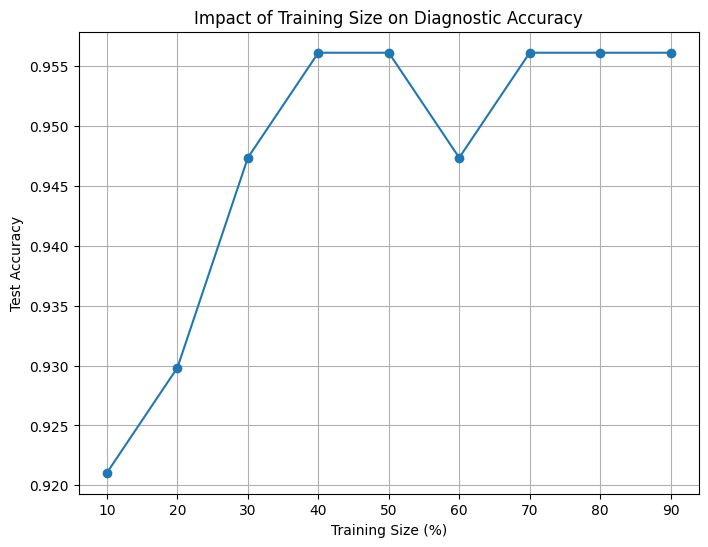

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define training sizes as fractions of the total training set (e.g., 10% to 90%)
train_sizes = np.linspace(0.1, 0.9, 9)  # From 10% to 90% of training data
accuracies = []

print("Training Size (%)\tAccuracy")
# Evaluate the model for each training size
for train_size in train_sizes:
    # Create a subset of the training data
    X_partial, _, y_partial, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)

    # Train the SVM model
    svm_model = SVC(kernel='rbf', C=10.0, gamma=0.01, random_state=42)
    svm_model.fit(X_partial, y_partial)

    # Evaluate the model on the test set
    y_test_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies.append(accuracy)
    # Print the training size percentage and accuracy
    print(f"{train_size * 100:.1f}\t\t{accuracy:.4f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(train_sizes * 100, accuracies, marker='o', linestyle='-')
plt.title("Impact of Training Size on Diagnostic Accuracy")
plt.xlabel("Training Size (%)")
plt.ylabel("Test Accuracy")
plt.grid()
plt.show()



---




# Bayesian Learning Implementation



*  Load and preprocess the breast cancer dataset
*    Handle feature scaling (crucial for this dataset)
* Implement a Multinomial Naive Bayes classifier using scikit-learn
* Test different alpha values: [0.1, 0.5, 1.0, 2.0]
* Experiment with fit_prior=True and fit_prior=False







1. Load and process data

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, mean_squared_error

#loading the dataset
file_path = '/content/brca.csv'
data = pd.read_csv(file_path)

#removing first column 'index'  and changing target variable y (Benign =0 and Malignant =1)
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)

data['y'] = data['y'].map({'B': 0, 'M': 1})

# seperatting x and y
X = data.drop('y', axis=1)
y = data['y']

# scaling features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

3. NB with cross validation

In [ ]:
# hyperparameter values
alpha_values = [0.1, 0.5, 1.0, 2.0]
fit_prior_options = [True, False]

# Sets up 5-fold cv w/ stratified sampling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []


4. Test w/ diff alpha values  [0.1, 0.5, 1.0, 2.0]

In [ ]:
for alpha in alpha_values:
    for fit_prior in fit_prior_options:
        # initialize NB
        nb_model = MultinomialNB(alpha=alpha, fit_prior=fit_prior)

        fold_accuracies = []
        fold_mses = []

        # CV
        for train_idx, test_idx in cv.split(X_scaled, y):
            # data splitting
            X_train_cv, X_test_cv = X_scaled[train_idx], X_scaled[test_idx]
            y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

            nb_model.fit(X_train_cv, y_train_cv)
            y_pred_cv = nb_model.predict(X_test_cv)

            accuracy = accuracy_score(y_test_cv, y_pred_cv)
            mse = mean_squared_error(y_test_cv, y_pred_cv)

            fold_accuracies.append(accuracy)
            fold_mses.append(mse)

        mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        mean_mse = sum(fold_mses) / len(fold_mses)

        # Store the results
        results.append({
            'Alpha': alpha,
            'Fit Prior': fit_prior,
            'Mean Accuracy': mean_accuracy,
            'Mean MSE': mean_mse
        })

5. Resuts

In [ ]:
results_df = pd.DataFrame(results)

results_df_sorted = results_df.sort_values(by='Mean Accuracy', ascending=False)

results_df_sorted


,Alpha,Fit Prior,Mean Accuracy,Mean MSE
7,2.0,False,0.850598,0.149402
5,1.0,False,0.847089,0.152911
3,0.5,False,0.845335,0.154665
0,0.1,True,0.845319,0.154681
1,0.1,False,0.843580,0.156420
2,0.5,True,0.838302,0.161698
4,1.0,True,0.836532,0.163468
6,2.0,True,0.834777,0.165223


\[
\begin{array}{|c|c|c|c|}
\hline
\textbf{Alpha} & \textbf{Fit Prior} & \textbf{Mean Accuracy} & \textbf{Mean MSE} \\ \hline
2.0 & \text{False} & 0.850598 & 0.149402 \\ \hline
1.0 & \text{False} & 0.847089 & 0.152911 \\ \hline
0.5 & \text{False} & 0.845335 & 0.154665 \\ \hline
0.1 & \text{True}  & 0.845319 & 0.154681 \\ \hline
0.1 & \text{False} & 0.843580 & 0.156420 \\ \hline
0.5 & \text{True}  & 0.838302 & 0.161698 \\ \hline
1.0 & \text{True}  & 0.836532 & 0.163468 \\ \hline
2.0 & \text{True}  & 0.834777 & 0.165223 \\ \hline
\end{array}
\]


Best output is alpha = 2 and fit prior = False w/  highest mean accuracy (0.8506) and the lowest mean MSE (0.1494).



---



 # Comparative Analysis

 **Compare SVM vs NB performance metrics**





1. SVM vs NB test accurcy and CV

In [ ]:
# Extract the best Naive Bayes results
nb_best_accuracy = results_df_sorted.iloc[0]['Mean Accuracy']
nb_best_mse = results_df_sorted.iloc[0]['Mean MSE']

# Assuming SVM metrics are already computed
svm_accuracy = accuracy_score(y_test, y_test_pred)
svm_test_mse = mean_squared_error(y_test, y_test_pred)

# Compare results
comparison = pd.DataFrame({
    "Metric": ["Test Accuracy", "Cross-Validation MSE"],
    "SVM": [svm_accuracy, svm_test_mse],
    "Naive Bayes": [nb_best_accuracy, nb_best_mse]
})

print(comparison)


                 Metric      SVM  Naive Bayes
0         Test Accuracy  0.95614     0.850598
1  Cross-Validation MSE  0.04386     0.149402


2. Confusion matrix for SVM and NB

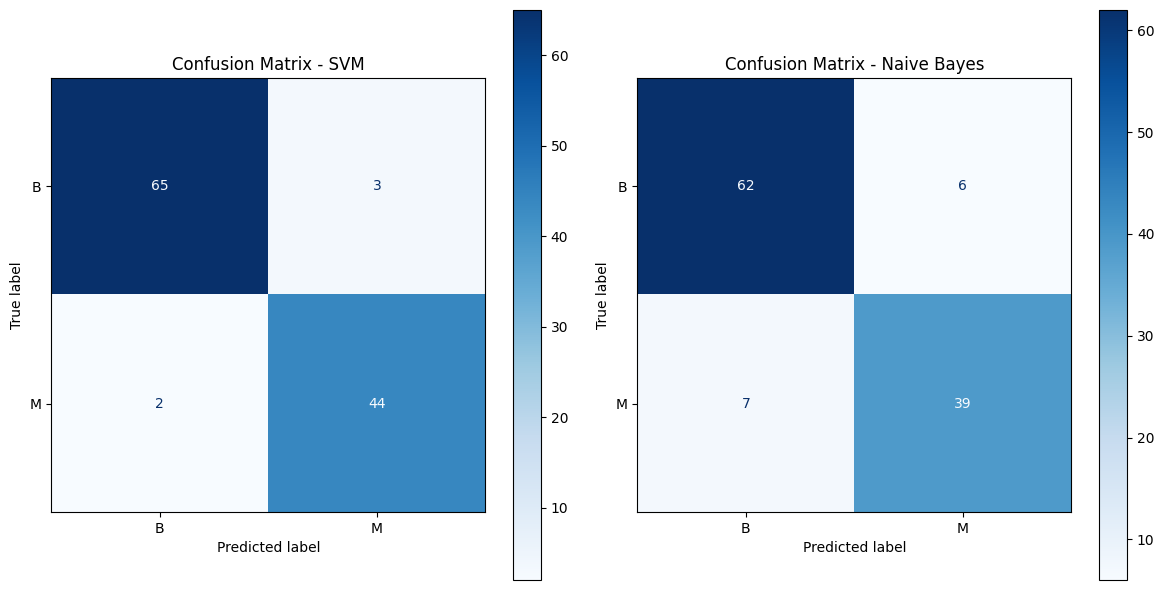

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, y_test_pred)
svm_display = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=["B", "M"])

# Confusion Matrix for Naive Bayes
nb_y_test_pred = nb_model.predict(X_test)  # Predicting with the NB model
nb_cm = confusion_matrix(y_test, nb_y_test_pred)
nb_display = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=["B", "M"])

# Plot side-by-side with a blue gradient
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

svm_display.plot(ax=ax[0], cmap='Blues')  # Use 'Blues' colormap
ax[0].set_title("Confusion Matrix - SVM")

nb_display.plot(ax=ax[1], cmap='Blues')  # Use 'Blues' colormap
ax[1].set_title("Confusion Matrix - Naive Bayes")

plt.tight_layout()
plt.show()


$$
\begin{array}{|l|c|c|}
\hline
\textbf{Metric} & \textbf{SVM} & \textbf{Naive Bayes} \\ \hline
\textbf{True Positives (TP)} & 44 & 39 \\ \hline
\textbf{True Negatives (TN)} & 65 & 64 \\ \hline
\textbf{False Positives (FP)} & 3 & 4 \\ \hline
\textbf{False Negatives (FN)} & 2 & 7 \\ \hline
\end{array}
$$


SVM Outperforms NB in:
- Detecting M cases (fewer false negatives).
- Classifying B cases (fewer false positives).

3. Cross Validation performance



In [ ]:
from sklearn.model_selection import cross_val_score

# SVM Cross-Validation Accuracy
svm_cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5, scoring='accuracy')
print(f"SVM Cross-Validation Accuracy: {svm_cv_scores.mean():.4f}")

# Naive Bayes Cross-Validation Accuracy
nb_cv_scores = cross_val_score(nb_model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Naive Bayes Cross-Validation Accuracy: {nb_cv_scores.mean():.4f}")


SVM Cross-Validation Accuracy: 0.9578
Naive Bayes Cross-Validation Accuracy: 0.8383


**Analyze computational efficiency**

1. Training and prediction time

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
svm_model = SVC(kernel='rbf', C=1.0, gamma=0.1)
nb_model = MultinomialNB()

# Measure SVM training time
start_time = time.time()
svm_model.fit(X_train_scaled, y_train)
svm_train_time = time.time() - start_time

# Measure SVM prediction time
start_time = time.time()
svm_predictions = svm_model.predict(X_test_scaled)
svm_prediction_time = time.time() - start_time

# Measure Naive Bayes training time
start_time = time.time()
nb_model.fit(X_train_scaled, y_train)
nb_train_time = time.time() - start_time

# Measure Naive Bayes prediction time
start_time = time.time()
nb_predictions = nb_model.predict(X_test_scaled)
nb_prediction_time = time.time() - start_time

# Print results
print(f"SVM Training Time: {svm_train_time:.4f} seconds")
print(f"SVM Prediction Time: {svm_prediction_time:.4f} seconds")
print(f"Naive Bayes Training Time: {nb_train_time:.4f} seconds")
print(f"Naive Bayes Prediction Time: {nb_prediction_time:.4f} seconds")


SVM Training Time: 0.0052 seconds
SVM Prediction Time: 0.0016 seconds
Naive Bayes Training Time: 0.0016 seconds
Naive Bayes Prediction Time: 0.0003 seconds


2. Memory usage

In [ ]:
!pip install -q memory-profiler

In [ ]:
%%writefile memory_profile.py
from memory_profiler import profile
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
svm_model = SVC(kernel='rbf', C=1.0, gamma=0.1, probability=True)
nb_model = MultinomialNB()

@profile
def train_svm():
    svm_model.fit(X_train, y_train)

@profile
def train_nb():
    nb_model.fit(X_train, y_train)

if __name__ == "__main__":
    train_svm()
    train_nb()


Writing memory_profile.py


In [ ]:
!mprof run memory_profile.py

mprof: Sampling memory every 0.1s
running new process
running as a Python program...
Filename: memory_profile.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    20    175.4 MiB    175.4 MiB           1   @profile
    21                                         def train_svm():
    22    176.6 MiB      1.2 MiB           1       svm_model.fit(X_train, y_train)


Filename: memory_profile.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    24    176.6 MiB    176.6 MiB           1   @profile
    25                                         def train_nb():
    26    177.1 MiB      0.6 MiB           1       nb_model.fit(X_train, y_train)




In [ ]:
!mprof plot

Using last profile data.
Figure(1260x540)


**Conclusion**

**Naive Bayes** is computationally more efficient in both training and prediction due to its simplicity.

**SVM** can handle complex relationships but is slower, especially with large datasets or non-linear kernels.

Use Naive Bayes for fast, interpretable models and SVM for higher accuracy when training time is less critical.